In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import seaborn as sns

from pylab import *

%matplotlib inline


master = pd.read_csv('master.csv')


In [2]:
bad_countries = ['Dominica','Grenada','Jamaica','Kiribati','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and Grenadines','San Marino',
'Seychelles','Albania','Antigua and Barbuda','Armenia','Aruba','Azerbaijan','Bahamas','Bahrain','Barbados','Belize','Bulgaria',
'Costa Rica','Cyprus','Macau','Maldives','Malta','Mongolia','Montenegro','Nicaragua','Oman']

years=[2016]

master_good =master[~(master['country'].isin(bad_countries)| master['year'].isin(years))] 

master_good

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
master_good.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

We want to identify any correlation between age and suicide rates. The age column is currently an object type, so we'll need to convert it to a float. This is a problem since the age column contains a range. As a result, we decided to take the mean of the age range and then plot the result

In [4]:
#Function to convert the age column into integers based on mean of the range

def age_to_int(df):
    if df['age'] == '75+ years':
        age = 75
    elif df['age'] == '55-74 years':
        age=65
    elif df['age']=='35-54 years':
        age=45
    elif df['age']=='25-34 years':
        age=30
    elif df['age']=='15-24 years':
        age=20
    elif df['age']=='5-14 years':
        age=10
    return age

In [5]:
master_good['age_int']=master_good.apply(age_to_int, axis=1)

/home/pjammu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


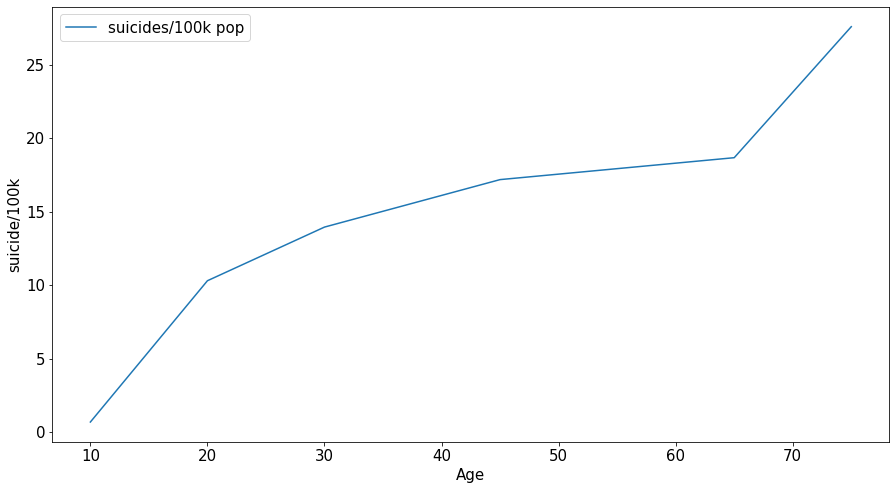

In [6]:
plt.rcParams["figure.figsize"] = (15,8)

master_good.groupby(['age_int'])['suicides/100k pop'].mean().plot()


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('suicide/100k',fontsize=15)
plt.legend(fontsize=15)

In [7]:
master_good_grouped = master_good.groupby(['age_int'], as_index=False)['suicides/100k pop'].mean()
master_good_grouped.set_index('age_int')
master_good_grouped[['age_int','suicides/100k pop']].corr()

,age_int,suicides/100k pop
age_int,1.000000,0.937858
suicides/100k pop,0.937858,1.000000


<b>1985 vs 2015</b>

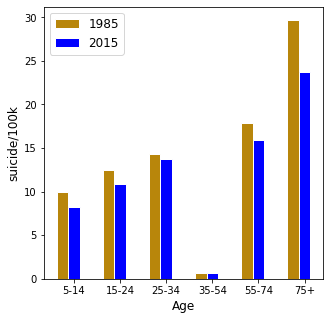

In [8]:
from matplotlib import rc

df_1985=master_good[master_good['year']==1985]
df_2015=master_good[master_good['year']==2015]

df_1985_grouped=df_1985.groupby('age')['suicides/100k pop'].mean()
df_2015_grouped=df_2015.groupby('age')['suicides/100k pop'].mean()

plt.figure(figsize=(5,5))

rc('font')
barWidth=0.25
data_1985=df_1985_grouped.tolist()
data_2015=df_2015_grouped.tolist()

r=np.arange(len(data_1985))
r2=[x + barWidth for x in r]

names=['5-14','15-24','25-34', '35-54', '55-74', '75+']


plt.bar(r, data_1985, color='darkgoldenrod', edgecolor='white', width=barWidth, label='1985')
plt.bar(r2, data_2015, color='blue', edgecolor='white', width=barWidth, label='2015')

plt.xticks([r + barWidth for r in range(len(data_1985))], names)

plt.xlabel('Age',fontsize=12)
plt.ylabel('suicide/100k',fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [9]:
year_summary=master_good.groupby('year').agg(tot_suicide=('suicides_no','mean')).sort_values \
                                    (by='year',ascending=True).reset_index()
year_summary.head()

,year,tot_suicide
0,1985,264.905093
1,1986,261.210526
2,1987,254.284553
3,1988,254.955128
4,1989,314.478175


In [10]:
age_against_suicides = master_good[['age','suicides/100k pop']]
age_against_suicides.head()

,age,suicides/100k pop
588,75+ years,55.65
589,55-74 years,24.29
590,35-54 years,12.37
591,55-74 years,9.11
592,25-34 years,7.92


In [11]:
generation_summary=master_good.groupby('generation').agg(tot_suicide=('suicides/100k pop','mean')).sort_values(by='tot_suicide',ascending=False).reset_index()
generation_summary.head(10)

,generation,tot_suicide
0,G.I. Generation,27.458467
1,Silent,21.333189
2,Boomers,16.952889
3,Generation X,12.064003
4,Millenials,6.124887
5,Generation Z,0.691227


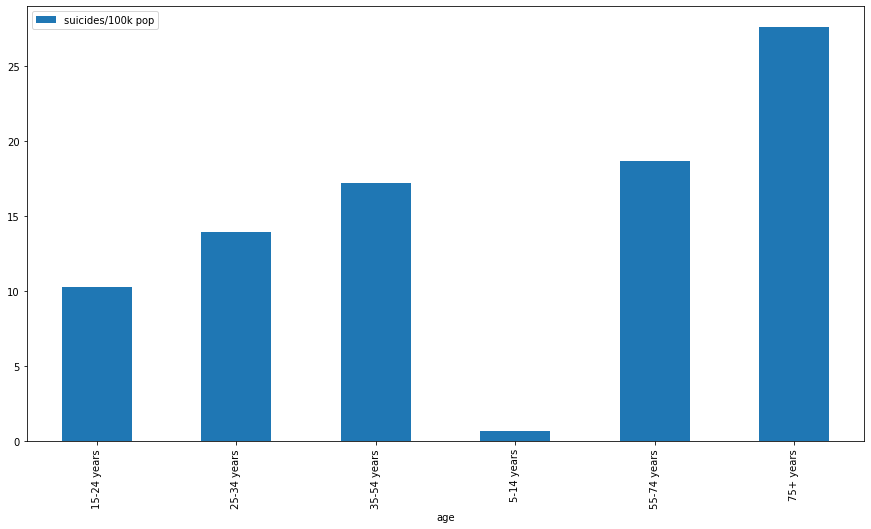

In [12]:
pivot_suicide=master_good.pivot_table(index=['age'],values=['suicides/100k pop'])

pivot_suicide.plot(kind='bar')

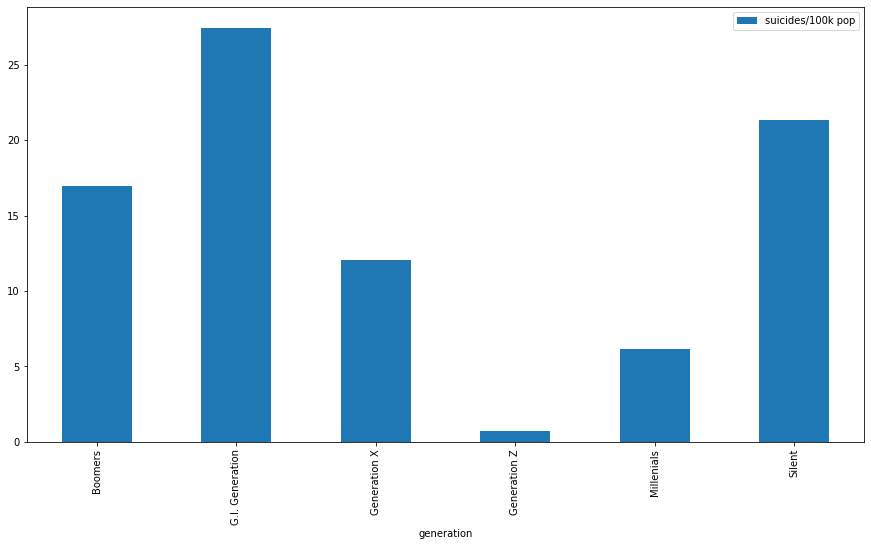

In [13]:
pivot_suicideGen=master_good.pivot_table(index=['generation'],values=['suicides/100k pop'])

pivot_suicideGen.plot(kind='bar')

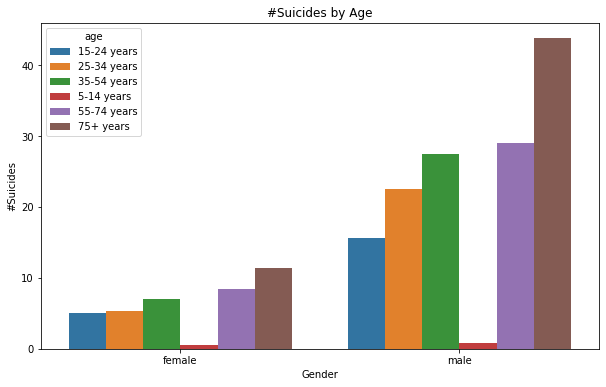

tot_suicide                                                          
age    15-24 years 25-34 years 35-54 years 5-14 years 55-74 years  75+ years
sex                                                                         
female    5.023507    5.335965    6.956759   0.512817    8.371185  11.398972
male     15.572268   22.564182   27.407640   0.844861   28.976721  43.785465

In [14]:
gender_age_summary=master_good.groupby(['sex','age']).agg(tot_suicide=('suicides/100k pop','mean')).reset_index()
gender_age_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Age')
ax=sns.barplot(x=gender_age_summary['sex'],y=gender_age_summary['tot_suicide'],hue=gender_age_summary['age']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
gender_age_summary1=master_good.groupby(['sex','age']).agg(tot_suicide=('suicides/100k pop','mean')).unstack()
gender_age_summary1.head()

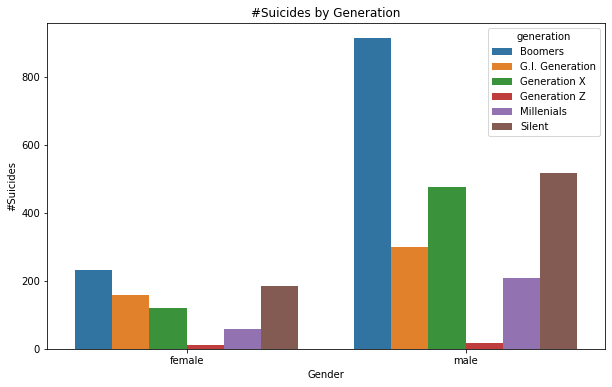

tot_suicide                                                        \
generation     Boomers G.I. Generation Generation X Generation Z  Millenials   
sex                                                                            
female      230.787374      158.750912   120.330192    10.241963   57.137348   
male        913.289899      299.294708   475.316451    16.340102  209.550260   

                        
generation      Silent  
sex                     
female      185.905653  
male        515.963376

In [15]:
generation_summary=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).reset_index()
generation_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Generation')
ax=sns.barplot(x=generation_summary['sex'],y=generation_summary['tot_suicide'],hue=generation_summary['generation']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
generation_summary1=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).unstack()
generation_summary1.head()

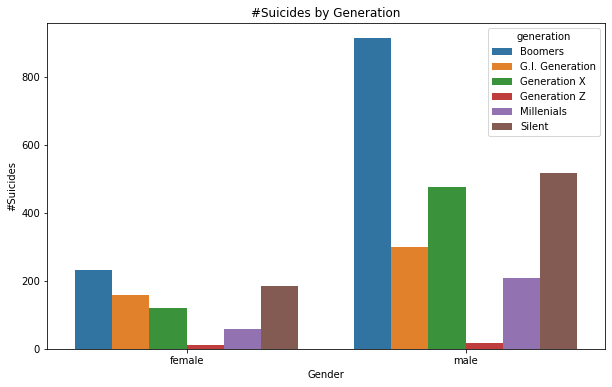

tot_suicide                                                        \
generation     Boomers G.I. Generation Generation X Generation Z  Millenials   
sex                                                                            
female      230.787374      158.750912   120.330192    10.241963   57.137348   
male        913.289899      299.294708   475.316451    16.340102  209.550260   

                        
generation      Silent  
sex                     
female      185.905653  
male        515.963376

In [16]:
generation_summary=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).reset_index()
generation_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Generation')
ax=sns.barplot(x=generation_summary['sex'],y=generation_summary['tot_suicide'],hue=generation_summary['generation']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
generation_summary1=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).unstack()
generation_summary1.head()

In [17]:
pivot_generation=master_good.pivot_table(index=['country','year', 'generation', 'age'],values=['suicides/100k pop','population'], aggfunc={'suicides/100k pop':mean,'population':sum})

pivot_generation

population  suicides/100k pop
country    year generation      age                                       
Argentina  1985 Boomers         25-34 years     4419400              5.445
                G.I. Generation 55-74 years     4301000             16.700
                                75+ years        900000             31.645
                Generation X    15-24 years     4769400              4.695
                                5-14 years      5999400              0.450
...                                                 ...                ...
Uzbekistan 2014 Generation X    35-54 years     7042133              9.065
                Generation Z    5-14 years      5393758              1.920
                Millenials      15-24 years     6119722             11.345
                                25-34 years     5474388              8.765
                Silent          75+ years        573460              5.070

[11034 rows x 2 columns]

In [18]:
master_good.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_int
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,75
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,65
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,45
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,65
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,30


In [19]:
by_Gen_Time = master_good.groupby(['generation','year']).mean().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Age_Time = master_good.groupby(['age','year']).mean().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Gen_Time

,generation,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),age_int
0,Millenials,1994,16.092593,2.469691e+06,0.608241,NaN,13140.166667,10.0
1,Generation Z,2015,15.707547,2.309092e+06,0.629245,NaN,28595.905660,10.0
2,Millenials,2000,15.568182,2.279963e+06,0.635606,0.764426,13380.363636,10.0
3,Generation Z,2014,14.492188,2.064624e+06,0.662578,0.818885,30384.765625,10.0
4,Millenials,1993,17.009615,2.600635e+06,0.665385,NaN,12114.423077,10.0
...,...,...,...,...,...,...,...,...
137,G.I. Generation,1997,158.346154,5.875195e+05,30.792538,NaN,13574.707692,75.0
138,G.I. Generation,1991,201.715686,6.575390e+05,31.097353,NaN,11748.078431,75.0
139,G.I. Generation,1994,187.092593,6.389864e+05,31.456667,NaN,13140.166667,75.0
140,G.I. Generation,1996,156.446154,5.760523e+05,31.544385,NaN,14124.661538,75.0


Text(0.5, 1.0, 'Evolution of average sucide/100k of population by Generation')

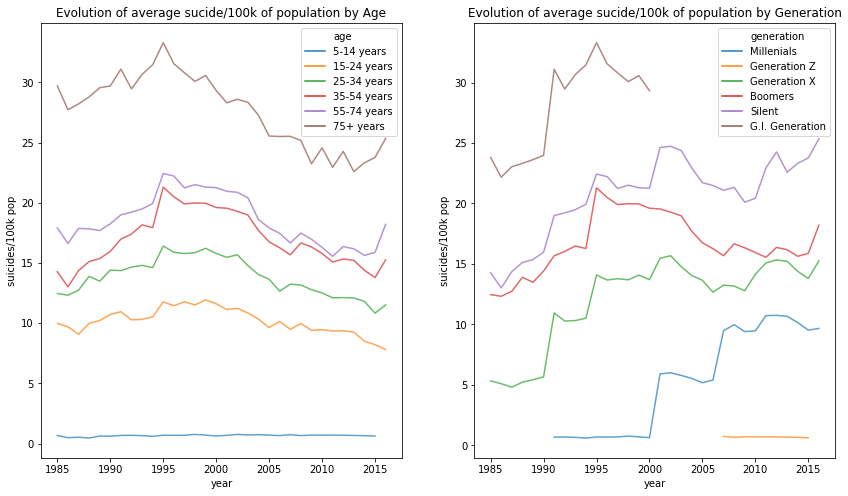

In [15]:
plt.figure(figsize=(22,8))
fig.subplots_adjust(hspace=.5)


plt.subplot(131)
sns.lineplot(x='year',y='suicides/100k pop', hue='age', data=by_Age_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Age')

plt.subplot(132)
sns.lineplot(x='year',y='suicides/100k pop', hue='generation', data=by_Gen_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Generation')

Text(0.5, 1.0, 'Generation Suicide Comparison')

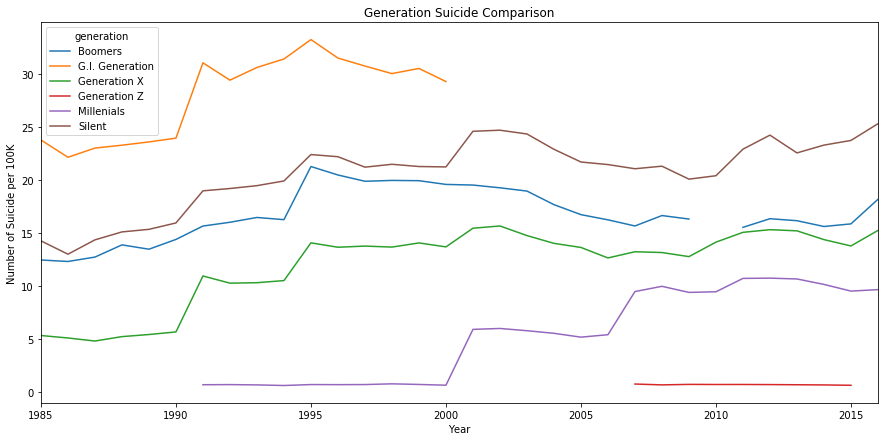

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['year', 'generation'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Suicide per 100K')
plt.title('Generation Suicide Comparison')

Text(0.5, 1.0, 'Country Suicide Comparison')

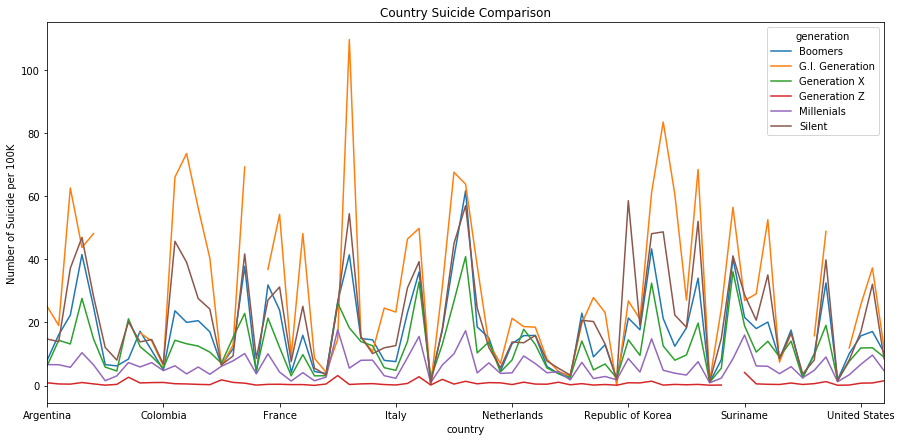

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'generation'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('country')
plt.ylabel('Number of Suicide per 100K')
plt.title('Country Suicide Comparison')

Text(0.5, 1.0, 'Age Suicide Comparison')

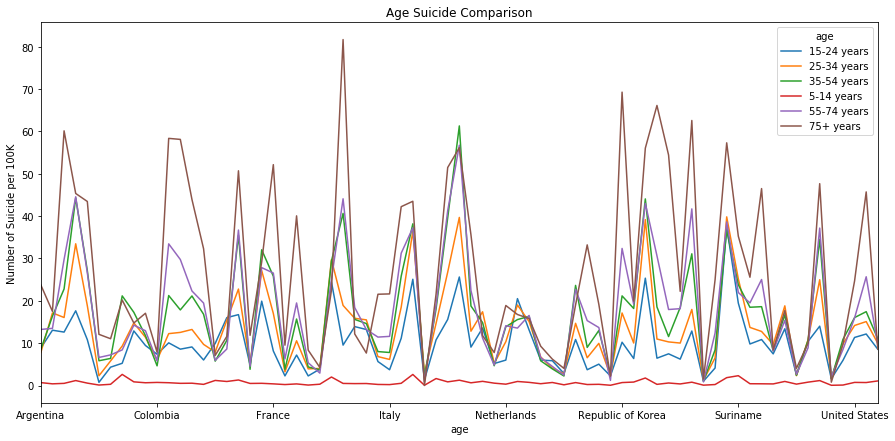

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'age'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('age')
plt.ylabel('Number of Suicide per 100K')
plt.title('Age Suicide Comparison')

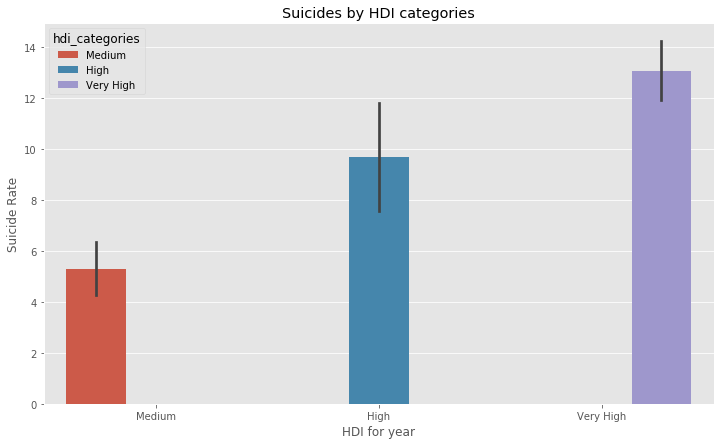

,HDI for year,suicide_rate
HDI for year,1.000000,0.388487
suicide_rate,0.388487,1.000000


In [39]:
data_withHDI = master_good.copy()
data_withHDI = data_withHDI[data_withHDI['HDI for year'].notnull()]

data_withHDI = data_withHDI[data_withHDI['year'].isin([2010,2011,2012,2013,2014])]

countries = list(data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year') \
                 .dropna().reset_index()['country'])
data_withHDI = data_withHDI[data_withHDI['country'].isin(countries)]

by_hdi = data_withHDI.groupby(['HDI for year'])[['population','suicides_no']].sum().reset_index()
by_hdi['suicide_rate'] = by_hdi['suicides_no']*100000/by_hdi['population']

by_hdi['hdi_categories'] = np.where(by_hdi['HDI for year'] >=0.8, "Very High",
                             np.where(by_hdi['HDI for year'].between(0.7,0.799), "High",
                             np.where(by_hdi['HDI for year'].between(0.555,0.699),"Medium","Low")))


plt.figure(figsize=(12,7))
plt.style.use('ggplot')
ax = sns.barplot(x="hdi_categories", y="suicide_rate", hue= 'hdi_categories', data=by_hdi)
ax.set(ylabel='Suicide Rate', xlabel='HDI for year', title = 'Suicides by HDI categories')
plt.show()
by_hdi[['HDI for year','suicide_rate']].corr()